# Exemples d'applications en calcul différentiel

In [25]:
from sympy import *
init_session()

IPython console for SymPy 1.13.3 (Python 3.11.3-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.3/



## Évolution d'une population de goélands
À la suite de la construction du métro entre Longueuil et Montréal, l’île Deslauriers a  été créé dans le fleuve Saint-Laurent. Ce nouvel habitat presque sans prédateur avec de la nourriture à profusion à proximité a offert au Goéland à bec cerclé un milieu pour croître très rapidement. Cette île abrite maintenant la colonie la plus importante de Goélands en Amérique du Nord.

On peut construire un modèle simple pour comprendre l’évolution de la population de goélands sur l’île en se basant sur les informations suivantes : un couple de goélands donne naissance en moyenne à 5 œufs par année et a une espérance de vie de 15 ans environ. On suppose que tous les œufs donnent vie à un goéland en bonne santé qui se reproduira l’année suivante.

S’il y a 50 goélands sur l’île lors de sa formation (année 0) et qu’ils forment tous des couples, combien y en aura-t-il l’année suivante ?

In [26]:
50+50/2*5

Combien y aura-t-il de goélands sur l’île après 3 ans ? 

In [27]:
50*(1+2.5)**3

Trouver une fonction 𝑃(𝑡) qui donne le nombre de goélands sur l’île après 𝑡 années et calculer le nombre de goélands après 20 ans.

In [28]:
P=50*(1+2.5)**t
P.subs(t,20)

Combien de Goélands y aura-t-il sur l’île à long terme ?


In [29]:
limit(P,t,oo)


On peut déterminer que ce modèle n'est pas réaliste puisque la population de goélands tend vers l'infini.

On veut tenir compte du fait que de la compétition s’installe entre les goélands pour l’accès à la nourriture et les sites de nidifications (les jeunes goélands s’entretuent en raison d’une trop grande densité de nid). On doit donc améliorer le modèle pour que la croissance diminue à partir d’un certain moment.

Le modèle logistique est souvent utilisé pour modéliser l’évolution de population animale. Nous prendrons le modèle suivant pour modéliser la population de goélands sur l’île Deslauriers.
$$
P(t) = \frac{150000}{1 + 3000e^{-t/2}}
$$
Calculer le nombre de goélands à la création de l’île selon ce modèle et après 20 ans.


In [ ]:
t=Symbol('t',real=True)
P = 150000 / (1 + 3000 * exp(-t / 2))
P.subs(t, 0).evalf()   # la méthode .evalf() permet d'évaluer la valeur numérique de l'expression comme la fonction N()

In [31]:
P.subs(t, 20).evalf()

Combien de goélands y aura-t-il sur l’île à long terme ?

In [32]:
limit(P, t, oo)

Comment pourrait-on trouver à quel moment la population va dépasser 100 000 individus ?

In [33]:
solve(Eq(P,100000),t)[0].evalf()

Comment pourrait-on calculer le taux de variation de la population de goélands à la 10e année ?


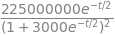

In [34]:
P1=P.diff(t)
P1

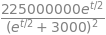

In [35]:
P1.simplify()

In [ ]:
P1.subs(t,10).evalf()   


À quel moment la croissance de la population va-t-elle commencer à diminuer ?

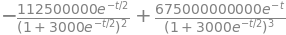

In [37]:
P2=P1.diff(t)
P2

In [38]:
point_inflexion=solve(P2,t)[0]
point_inflexion

In [ ]:
N(point_inflexion)

## Problème de taux liés
Par une journée sans vent, Jack se promène dans une montgolfière. La distante entre la balle et le sol est donnée par 𝑦(𝑡)=90−4,9𝑡^2, où 𝑦 est en mètres et 𝑡, en secondes. L’angle d’élévation du Soleil par rapport au sol est de 40°.
Déterminer à quelle vitesse la balle se déplace vers le sol lorsqu’elle est à 40 mètres du sol.

In [39]:
𝑦=90-4.9*𝑡**2
t1=solve(𝑦-40,t)   #temps lorsque la hauteur est de 40 m   
t1 #on prend la valeur positive


In [40]:
y1=y.diff(t)    #vitesse
y1.subs(t,t1[1])    #vitesse lorsque la hauteur est de 40 m

Déterminer à quelle vitesse l’ombre de la balle se déplace sur le sol au même moment.

In [41]:
x=y/tan(rad(40))    #position de l'ombre au sol par rapport au point directement sous la montgolfière
x

In [42]:
x1=x.diff(t)   #vitesse de l'ombre
x1

In [43]:
N(x1.subs(t,t1[1]))  #vitesse de l'ombre lorsque la hauteur est de 40 m

## Problème d'optimisation en biologie

La loi de Poiseuille est un modèle permettant de déterminer la résistance $ R $ à l’écoulement du sang dans les vaisseaux sanguins à partir du diamètre $D$ du vaisseau, de la longueur du trajet $L $ (tous deux en mètres) et de la viscosité du sang $\eta$ (qui est une constante dans un corps en santé). La résistance est donnée par :
$$R = \frac{\eta L}{\pi D^4}$$
Une artériole (petit vaisseau) rejoint une artère selon un angle $ \theta $ (voir figure).

<p align="center">
    <img src="Figures/Figure_bio1.png" alt="drawing" width="400"/>
</p>

Plus la résistance dans les vaisseaux est élevée, plus le cœur doit fournir de l’énergie pour faire circuler le sang. On veut donc trouver l’angle qui minimise la résistance totale à l’écoulement du sang le long de ce trajet. 
Trouver la solution générale puis évaluer celle-ci si on suppose que le diamètre de l’artère est $\sqrt[4]{2} $ plus grand que celui de l’artériole.


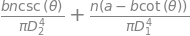

In [44]:
n, a, b, theta, D1, D2 = symbols("n, a, b, theta, D1, D2")
R= n*(a-b*cot(theta))/(pi*D1**4)+n*b*csc(theta)/(pi*D2**4)
R

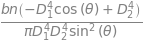

In [45]:
R1=simplify(R.diff(theta))
R1

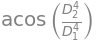

In [46]:
thetac=solve(R1,theta)[1]
thetac

In [47]:
thetac.subs(D1,2**(Rational(1/4))*D2)